In [4]:

import IPython
import sys

def clean_notebook():
    IPython.display.clear_output(wait=True)
    print("Notebook cleaned.")

!pip install pytubefix
!pip install ultralytics
!pip install roboflow

# Clean up the notebook
clean_notebook()


Notebook cleaned.


# Detection

In [ ]:
from ultralytics import YOLO
from tqdm import tqdm

# Load the model
model = YOLO("yolo11m.pt")

# Perform object detection on video with streaming and progress bar
results = model("https://youtu.be/kLKqeyx_HjY?si=iHTUyLNjtsUW1ths", save=True, stream=True, verbose=False)

# Iterate over the results with a progress bar
for result in tqdm(results, desc="Processing frames"):
    pass
    


Processing frames: 0it [00:00, ?it/s]

1/1: https://youtu.be/kLKqeyx_HjY?si=iHTUyLNjtsUW1ths... Success ✅ (4271 frames of shape 1920x1080 at 30.00 FPS)



Processing frames: 78it [00:06, 17.82it/s]

WARNING ⚠️ Waiting for stream 0


Processing frames: 195it [00:15, 14.91it/s]

WARNING ⚠️ Waiting for stream 0
WARNING ⚠️ Waiting for stream 0


Processing frames: 220it [00:16, 12.99it/s]

WARNING ⚠️ Waiting for stream 0


Processing frames: 367it [00:26, 14.05it/s]

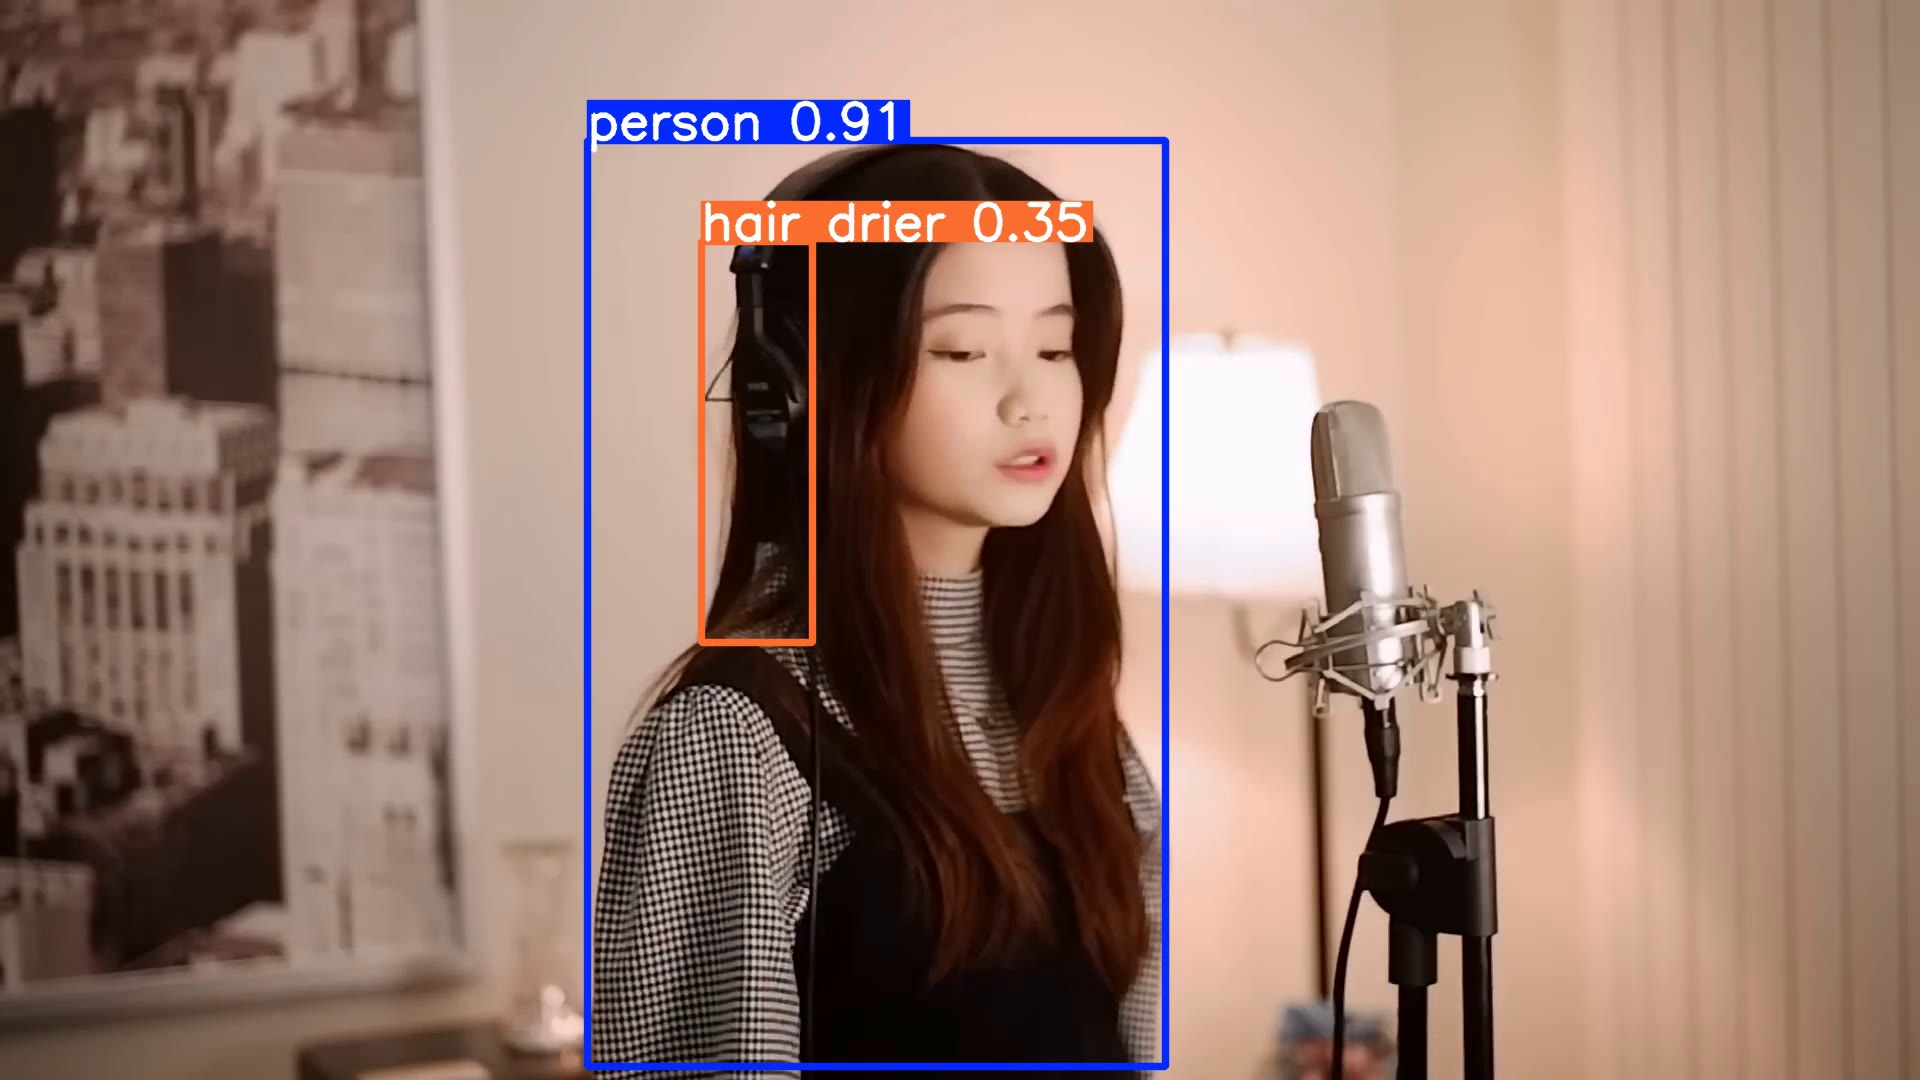

In [ ]:
import cv2
from IPython.display import display, Image, clear_output
import numpy as np

def display_video(video_path):
    """
    Displays a video file in a Jupyter Notebook.

    Parameters:
        video_path (str): Path to the video file.
    """
    # Open the video file
    cap = cv2.VideoCapture(video_path)

    if not cap.isOpened():
        print(f"Cannot open video file: {video_path}")
        return

    try:
        while cap.isOpened():
            ret, frame = cap.read()
            
            if not ret:
                print("Stream stopped.")
                break

            # Convert the frame to JPEG format for display in Jupyter
            _, buffer = cv2.imencode('.jpg', frame)
            img_bytes = buffer.tobytes()

            # Display the frame in Jupyter Notebook
            display(Image(data=img_bytes))
            clear_output(wait=True)  # Clear previous frame for smoother playback
    finally:
        cap.release()
        print("Video stream ended.")


display_video('./runs/detect/predict2/kLKqeyx_HjY_si_iHTUyLNjtsUW1ths.avi')


In [ ]:
results = model("/content/p.mp4",classes=0, save=True)

# Track

In [ ]:
#Bot Sort
results = model.track(source="/content/p.mp4", persist=True, save=True)

In [ ]:
# Byte Track
results = model.track("/content/p.mp4", persist=True, show=True, classes=0, tracker="bytetrack.yaml")